# House Prices: Advanced Regression Techniques
## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
# Default pandas columns are 20, we have more columns
pd.pandas.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('train.csv')

### Dataset Contains 81 Columns 
### SalePrice as our target Variable
### Id as a unique record

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.shape

(1460, 81)

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
data['LotFrontage'].mode()

0    60.0
dtype: float64

# Exploratory Data Analysis

### In this Step we will do following tasks
1. Finding Missing Values
2. Finding Numerical Variables
3. Distribution of Numerical Variables
4. Find Categorical Variables
5. Computing Cardinality Of Categorical Variables
6. Finding Outliers
7. Finding Relationships, in between type of variables
8. With Correlation Matrix / Plot

## Mising Values

In [9]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Which is true with previous info as well 

In [10]:
missing_vals = data.isnull().sum()
cols_miss = 0
for m in missing_vals:
    if(m > 0):
        cols_miss+=1
print('Number of Columns With Missing Vals: {0}'.format(cols_miss))
    

Number of Columns With Missing Vals: 19


In [11]:
columns_with_na=[column for column in data.columns if data[column].isnull().sum()>1]

for column in columns_with_na:
    print('{0} contains {1} missing values'.format(column, data[column].isnull().sum()))

LotFrontage contains 259 missing values
Alley contains 1369 missing values
MasVnrType contains 8 missing values
MasVnrArea contains 8 missing values
BsmtQual contains 37 missing values
BsmtCond contains 37 missing values
BsmtExposure contains 38 missing values
BsmtFinType1 contains 37 missing values
BsmtFinType2 contains 38 missing values
FireplaceQu contains 690 missing values
GarageType contains 81 missing values
GarageYrBlt contains 81 missing values
GarageFinish contains 81 missing values
GarageQual contains 81 missing values
GarageCond contains 81 missing values
PoolQC contains 1453 missing values
Fence contains 1179 missing values
MiscFeature contains 1406 missing values


In [12]:
for column in columns_with_na:
    print('{0} contains {1} % of missing values'.format(column, np.round(data[column].isnull().mean() * 100, 2)))

LotFrontage contains 17.74 % of missing values
Alley contains 93.77 % of missing values
MasVnrType contains 0.55 % of missing values
MasVnrArea contains 0.55 % of missing values
BsmtQual contains 2.53 % of missing values
BsmtCond contains 2.53 % of missing values
BsmtExposure contains 2.6 % of missing values
BsmtFinType1 contains 2.53 % of missing values
BsmtFinType2 contains 2.6 % of missing values
FireplaceQu contains 47.26 % of missing values
GarageType contains 5.55 % of missing values
GarageYrBlt contains 5.55 % of missing values
GarageFinish contains 5.55 % of missing values
GarageQual contains 5.55 % of missing values
GarageCond contains 5.55 % of missing values
PoolQC contains 99.52 % of missing values
Fence contains 80.75 % of missing values
MiscFeature contains 96.3 % of missing values


## There are many columns which contains missing values
### With MiscFeature PoolQC highest percentage of 99.52, which means almost not info available at all

## Relationship of missing values with SalesPrice

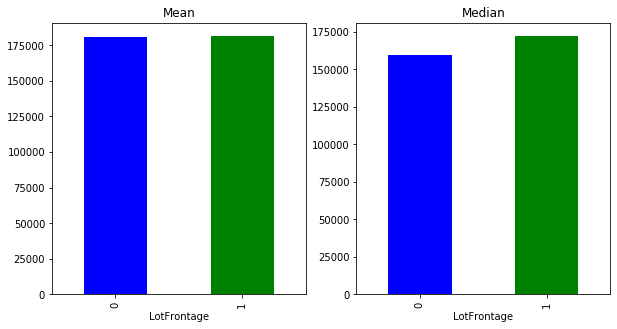

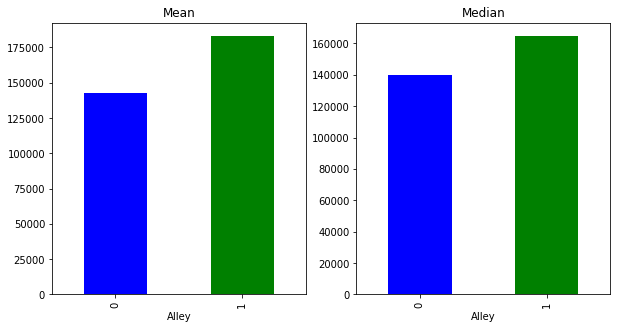

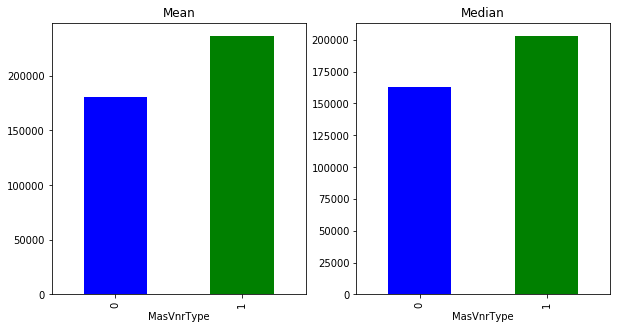

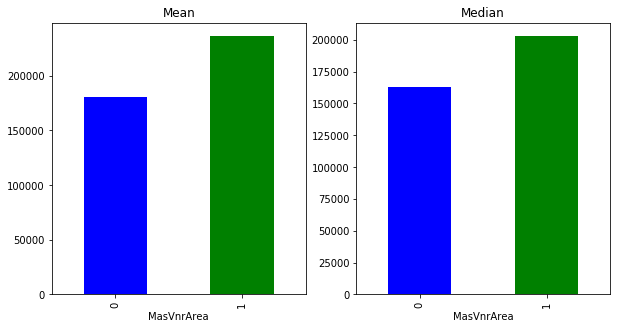

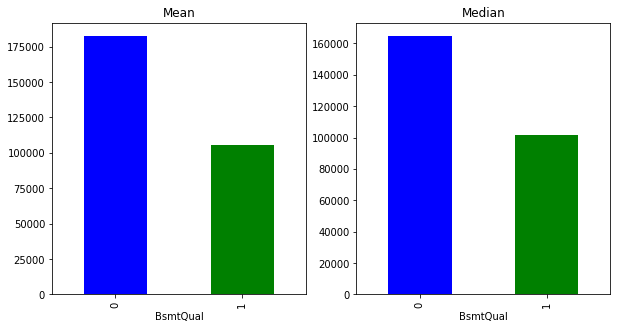

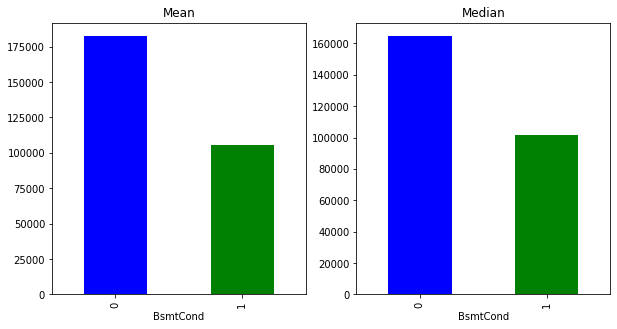

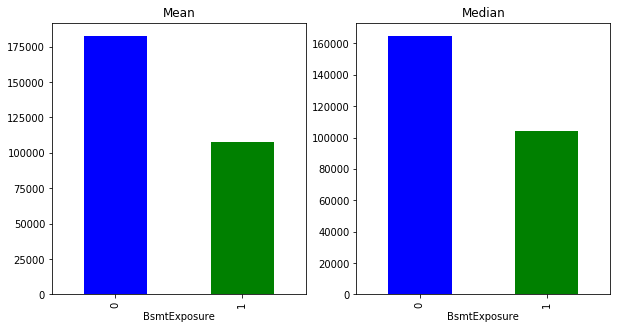

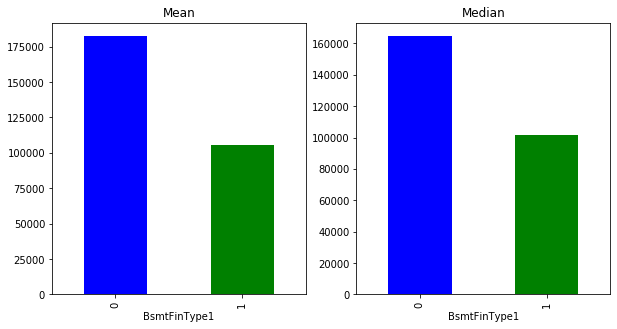

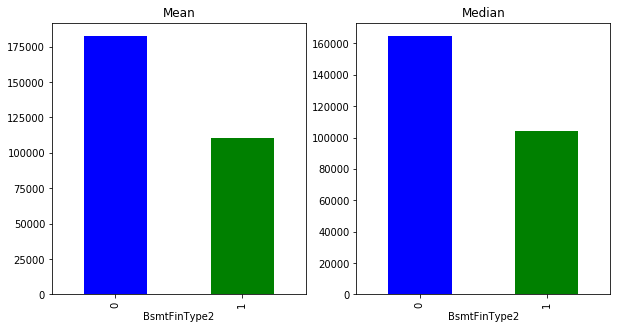

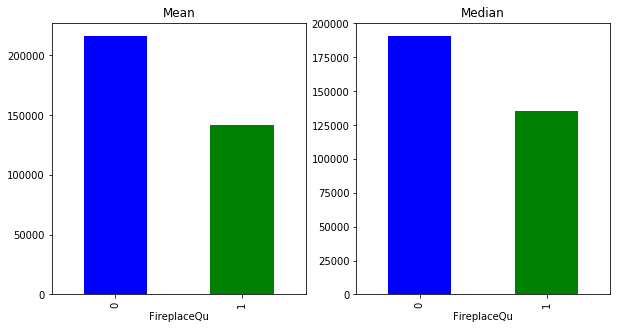

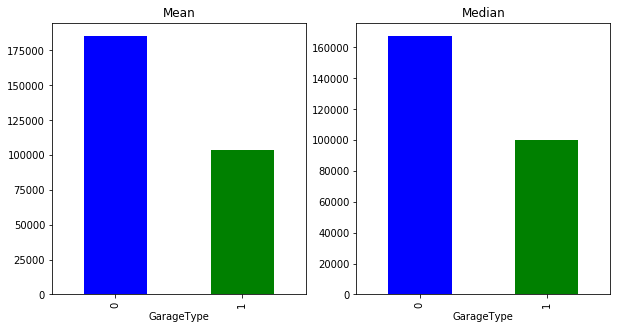

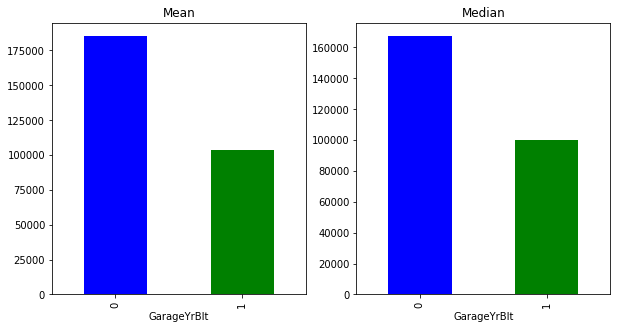

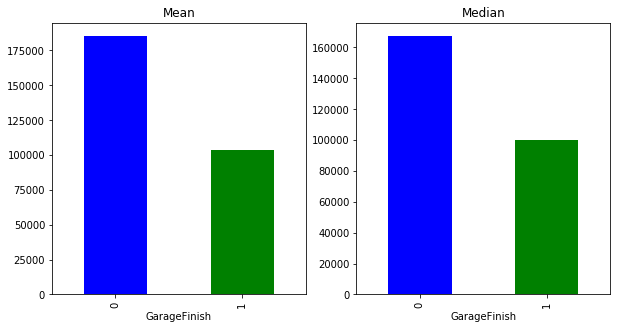

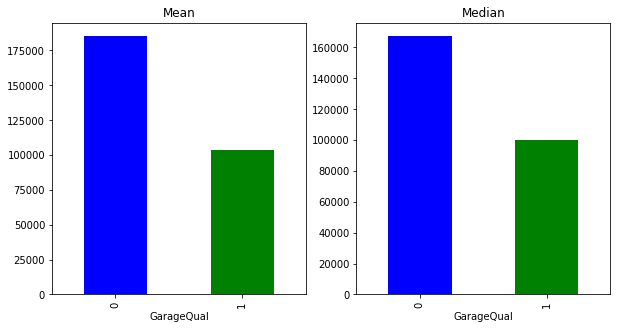

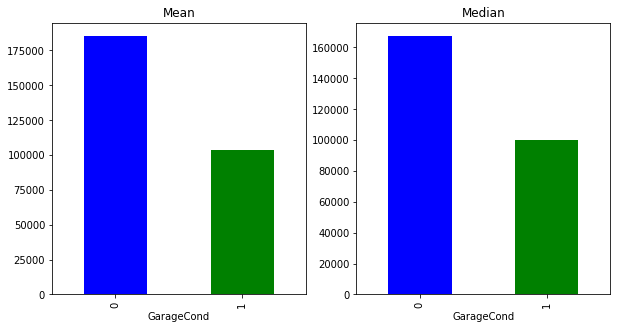

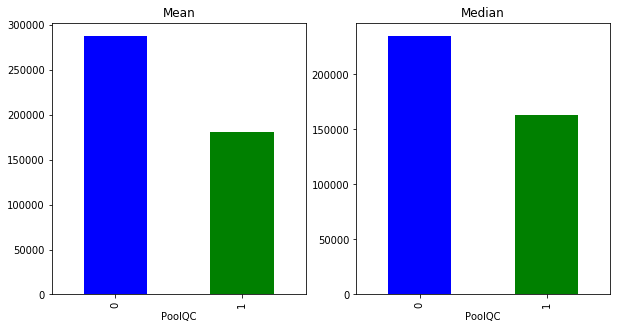

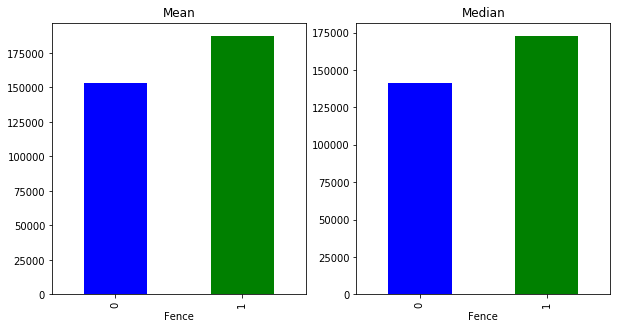

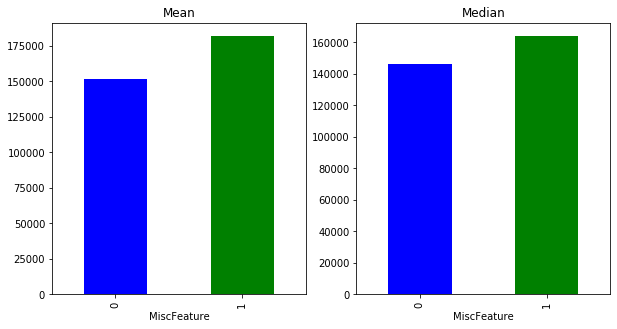

In [13]:
for column in columns_with_na:
    data_copy = data.copy()
    
    # variable for value whether missing or present. missing/present (1/0)
    data_copy[column] = np.where(data_copy[column].isnull(), 1, 0)
    
    # Calculating mean/median SalesPrice where the information is missing or present
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    data_copy.groupby(column)['SalePrice'].mean().plot(kind='bar', color=['b', 'g'], ax=ax[0], title='Mean')
    data_copy.groupby(column)['SalePrice'].median().plot(kind='bar', color=['b', 'g'], ax=ax[1], title='Median')
    plt.show()

### There is a clear relationship between missing values and SalePrice, which can be shown with LotFrontage feature, furthermore mean remains same when observations is missing or present but the median changes with presence of LotFrontage
### Since Dataset Contains Missing values, so median is the best measure
### May contain outliers as well

## Numerical Variables

In [14]:
# list of numerical variables
numerical_columns = [column for column in data.columns if data[column].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_columns))

# displaying some first 5 records..
data[numerical_columns].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## We have DateTime variables as well
### four year variables

In [15]:
# list of variables that contain year information
year_columns = [column for column in numerical_columns if 'Yr' in column or 'Year' in column]

print(year_columns)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [16]:
# looking at the year values
for column in year_columns:
    print(column, data[column].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

## Relationship of Year Sold With SalePrice 

Text(0.5, 1.0, 'House Price vs YearSold')

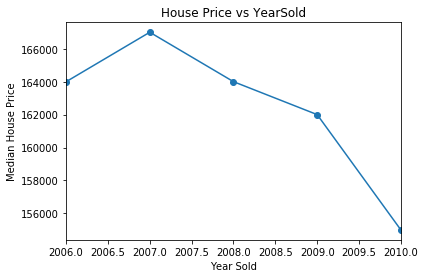

In [17]:
data.groupby('YrSold')['SalePrice'].median().plot(marker='o')
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

## just looking at the above we cannot tell the reason of price fall
## Relationship of Year Built With SalePrice 

Text(0.5, 1.0, 'House Price vs Year Built')

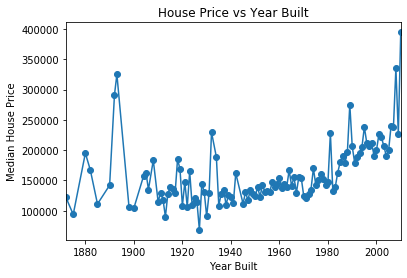

In [18]:
data.groupby('YearBuilt')['SalePrice'].median().plot(marker='o')
plt.xlabel('Year Built')
plt.ylabel('Median House Price')
plt.title("House Price vs Year Built")

## Relationship of Year Remodeling With SalePrice 

Text(0.5, 1.0, 'House Price vs Year Remodel Year')

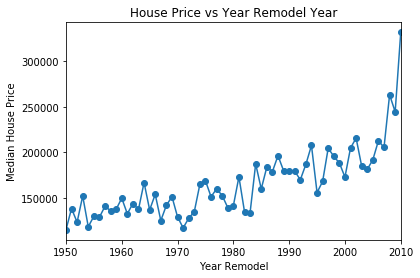

In [19]:
data.groupby('YearRemodAdd')['SalePrice'].median().plot(marker='o')
plt.xlabel('Year Remodel')
plt.ylabel('Median House Price')
plt.title("House Price vs Year Remodel Year")

## Relationship of Garage Year Built With SalePrice 

Text(0.5, 1.0, 'House Price vs Year Remodel Year')

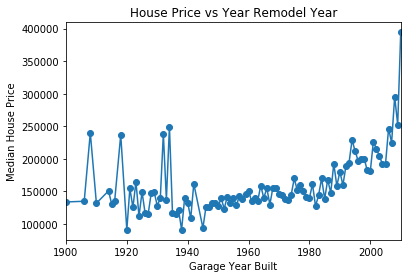

In [20]:
data.groupby('GarageYrBlt')['SalePrice'].median().plot(marker='o')
plt.xlabel('Garage Year Built')
plt.ylabel('Median House Price')
plt.title("House Price vs Year Remodel Year")

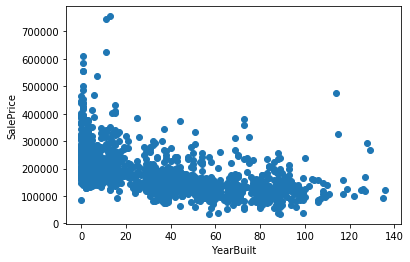

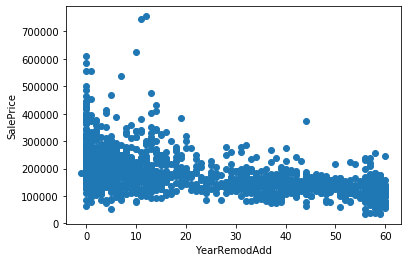

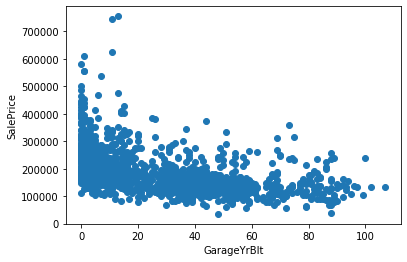

In [21]:
## Here we will compare the difference between All years other then YrSold feature with SalePrice
for column in year_columns:
    if column!='YrSold':
        data_copy=data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data_copy[column]=data_copy['YrSold']-data_copy[column]

        plt.scatter(data_copy[column],data_copy['SalePrice'])
        plt.xlabel(column)
        plt.ylabel('SalePrice')
        plt.show()

## Discrete Variables

In [22]:
discrete_columns=[column for column in numerical_columns if len(data[column].unique())<25 and column not in year_columns+['Id']]
print("Number of Discrete Variables: {}".format(len(discrete_columns)))

Number of Discrete Variables: 17


In [23]:
discrete_columns

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [24]:
data[discrete_columns].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


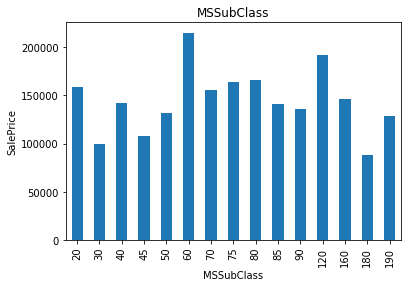

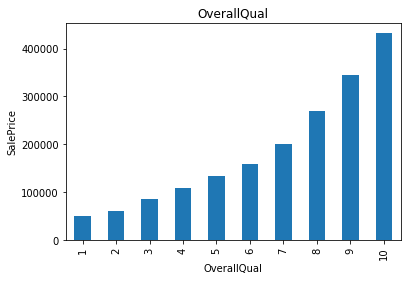

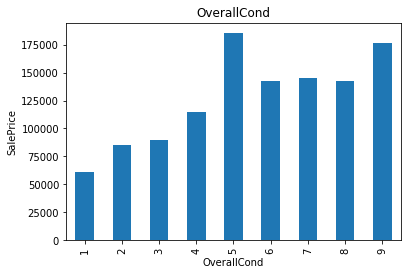

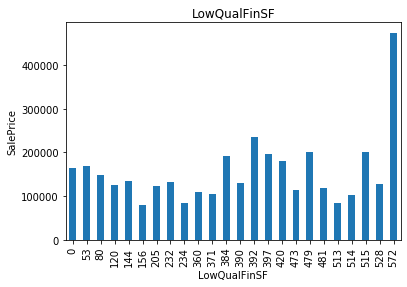

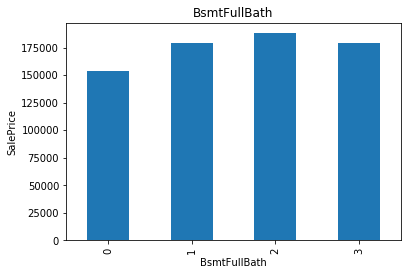

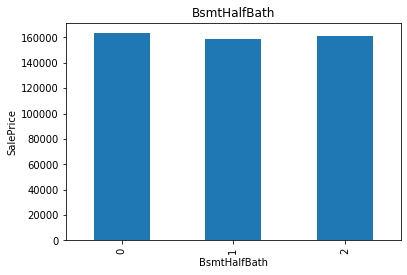

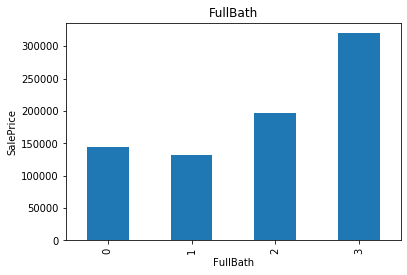

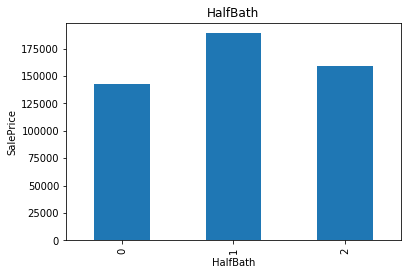

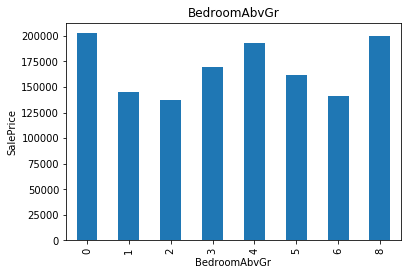

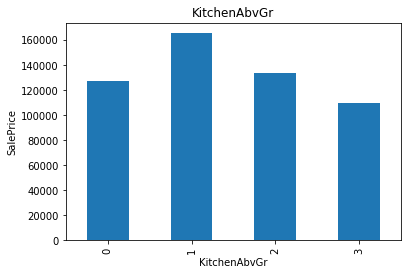

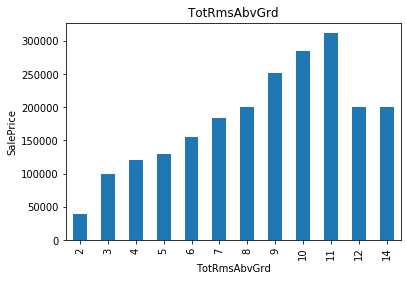

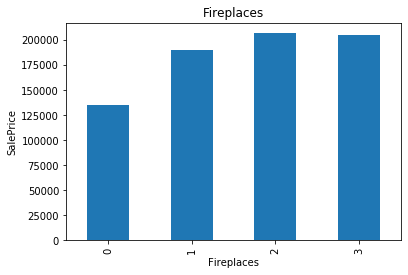

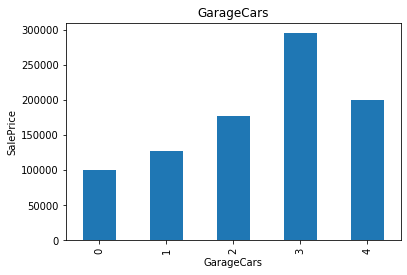

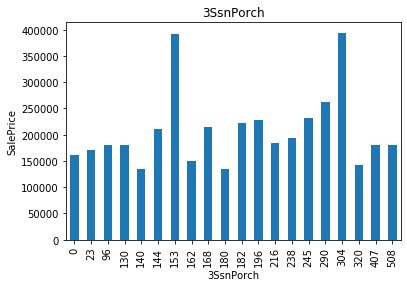

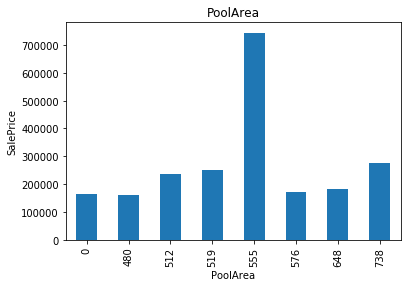

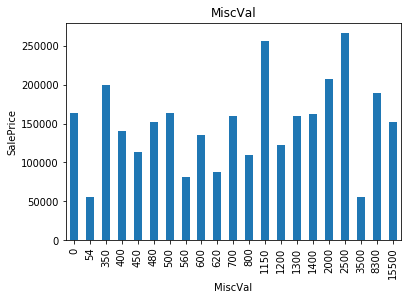

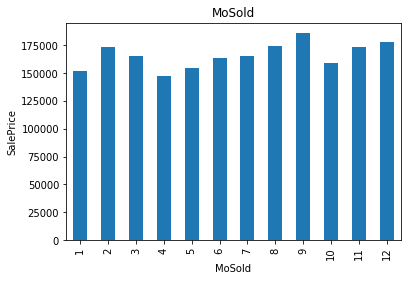

In [25]:
## Lets Find the realtionship between them and Sale PRice

for column in discrete_columns:
    data_copy=data.copy()
    data_copy.groupby(column)['SalePrice'].median().plot.bar()
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.title(column)
    plt.show()

## Continous Variables

In [26]:
continuous_columns=[column for column in numerical_columns if column not in discrete_columns+year_columns+['Id']]
print("Number of Continuous Variables {}".format(len(continuous_columns)))

Number of Continuous Variables 16


In [27]:
data[continuous_columns].head(10)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000
5,85.0,14115,0.0,732,0,64,796,796,566,1362,480,40,30,0,0,143000
6,75.0,10084,186.0,1369,0,317,1686,1694,0,1694,636,255,57,0,0,307000
7,NaN,10382,240.0,859,32,216,1107,1107,983,2090,484,235,204,228,0,200000
8,51.0,6120,0.0,0,0,952,952,1022,752,1774,468,90,0,205,0,129900
9,50.0,7420,0.0,851,0,140,991,1077,0,1077,205,0,4,0,0,118000


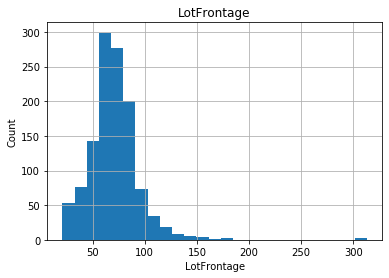

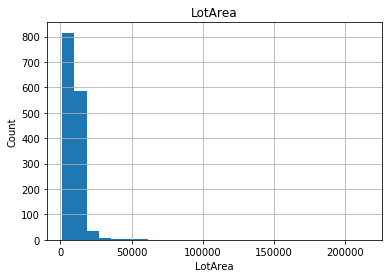

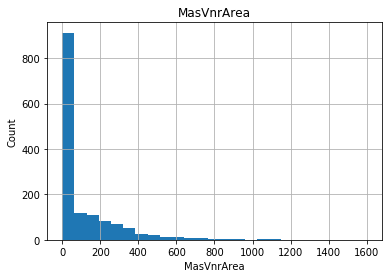

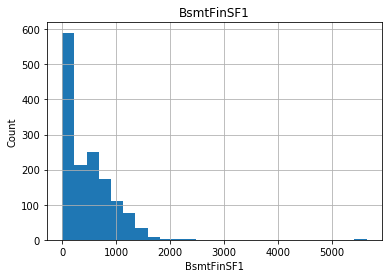

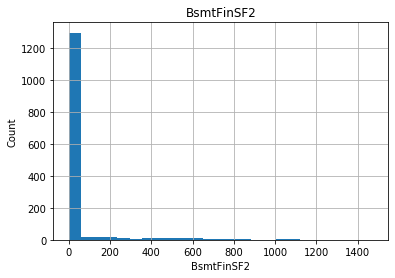

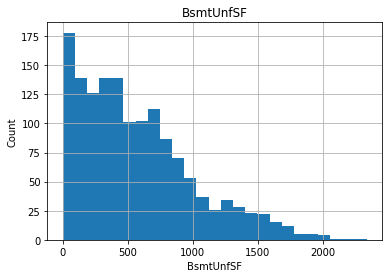

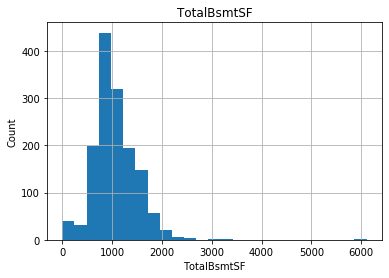

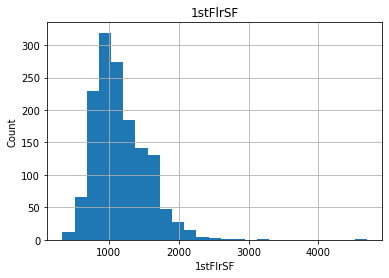

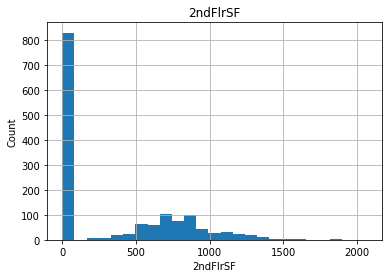

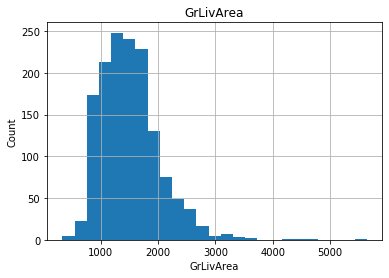

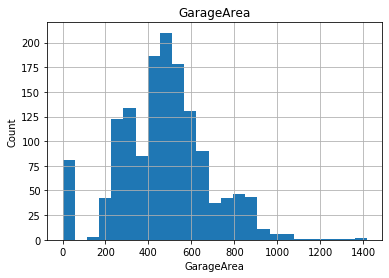

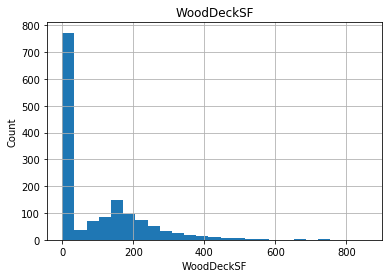

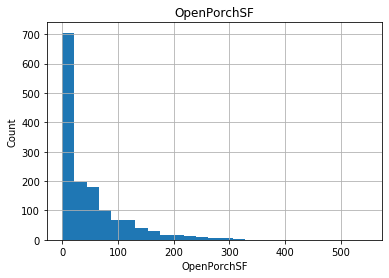

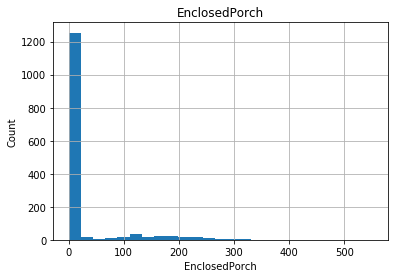

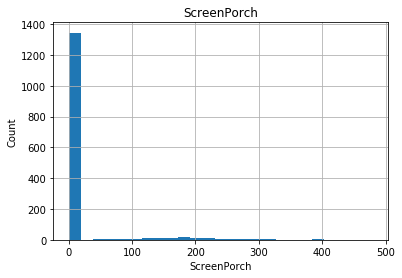

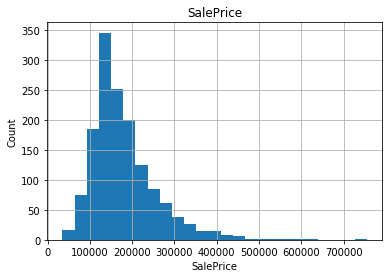

In [28]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for column in continuous_columns:
    data_copy=data.copy()
    data[column].hist(bins=25)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(column)
    plt.show()


## Categorical Variables

In [29]:
categorical_columns=[column for column in data.columns if data[column].dtypes=='O']
print(categorical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [30]:
data[categorical_columns].head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [31]:
print("Number of Categorical Variables {}".format(len(categorical_columns)))

Number of Categorical Variables 43


In [32]:
for column in categorical_columns:
    print('The column is {} and number of categories are {}'.format(column,len(data[column].unique())))

The column is MSZoning and number of categories are 5
The column is Street and number of categories are 2
The column is Alley and number of categories are 3
The column is LotShape and number of categories are 4
The column is LandContour and number of categories are 4
The column is Utilities and number of categories are 2
The column is LotConfig and number of categories are 5
The column is LandSlope and number of categories are 3
The column is Neighborhood and number of categories are 25
The column is Condition1 and number of categories are 9
The column is Condition2 and number of categories are 8
The column is BldgType and number of categories are 5
The column is HouseStyle and number of categories are 8
The column is RoofStyle and number of categories are 6
The column is RoofMatl and number of categories are 8
The column is Exterior1st and number of categories are 15
The column is Exterior2nd and number of categories are 16
The column is MasVnrType and number of categories are 5
The c

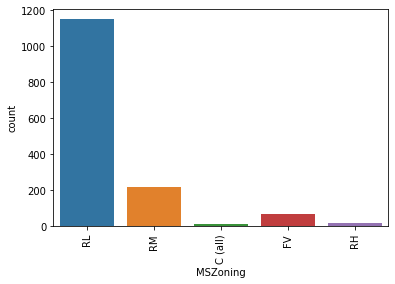

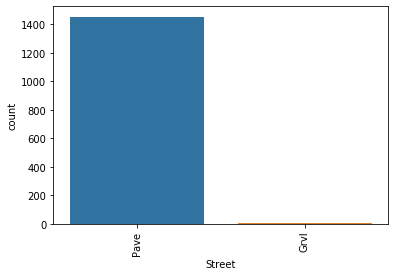

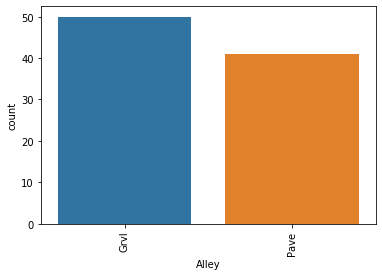

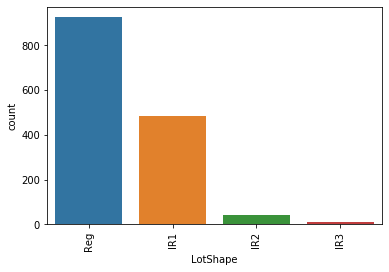

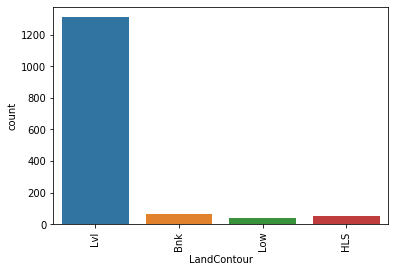

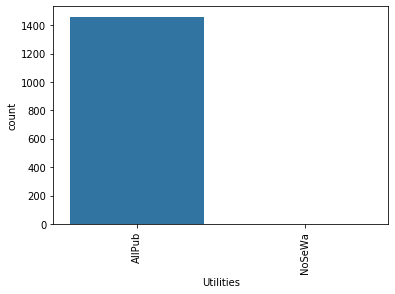

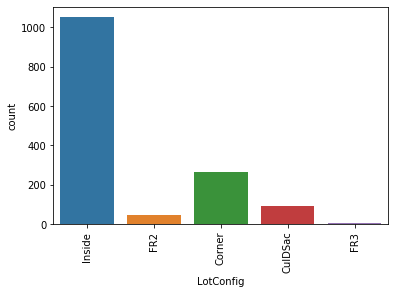

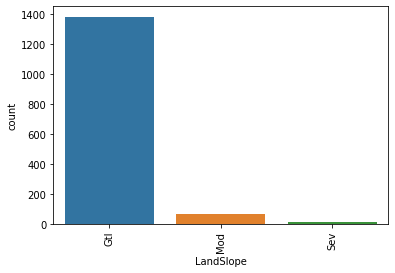

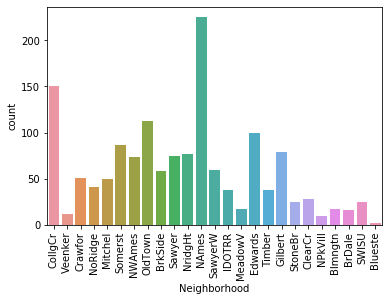

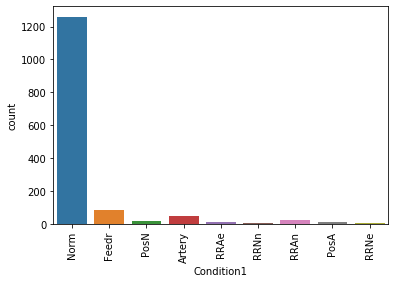

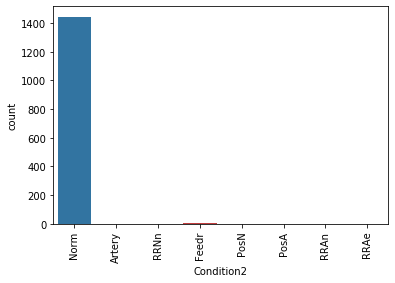

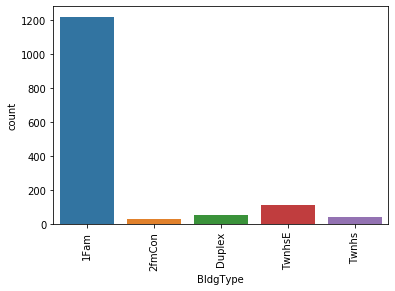

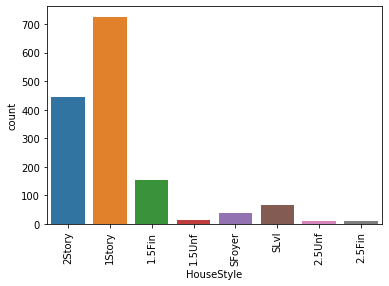

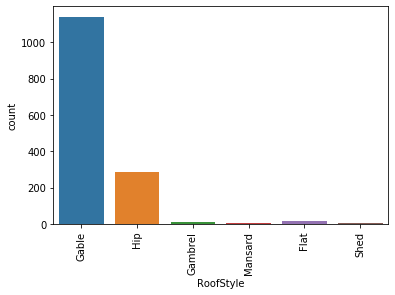

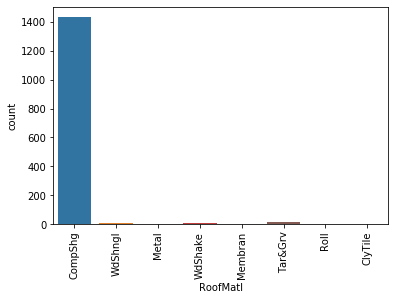

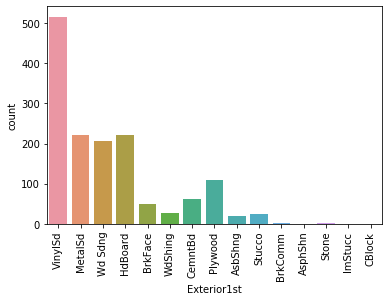

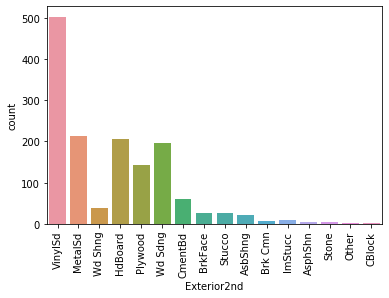

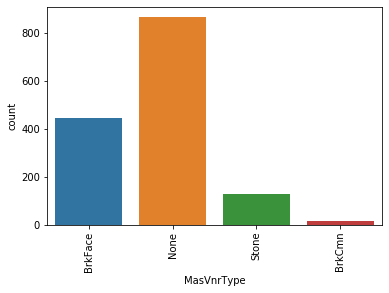

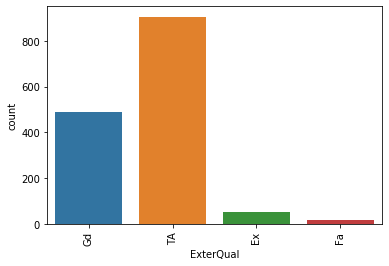

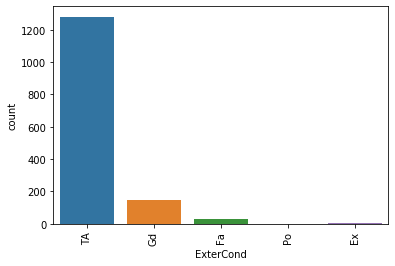

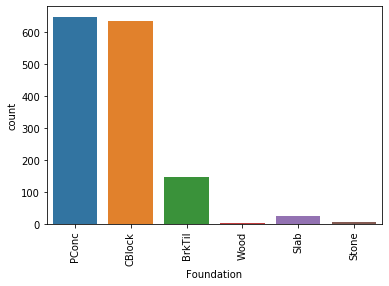

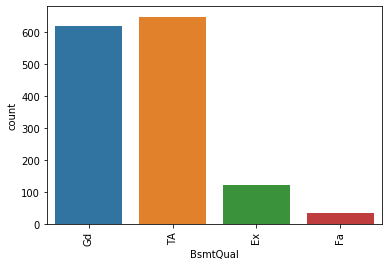

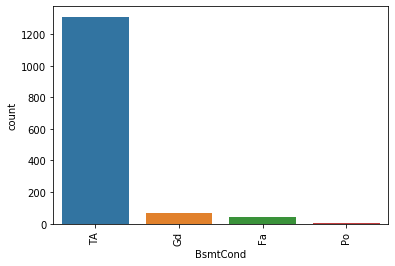

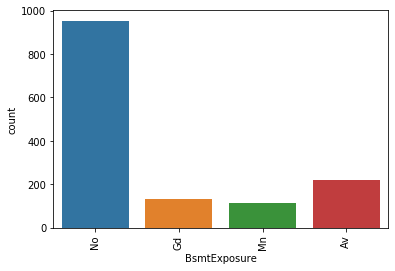

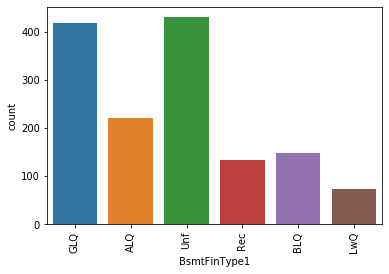

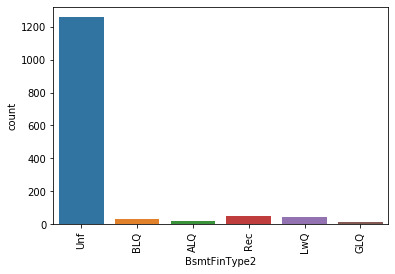

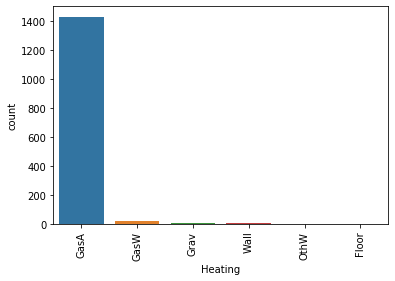

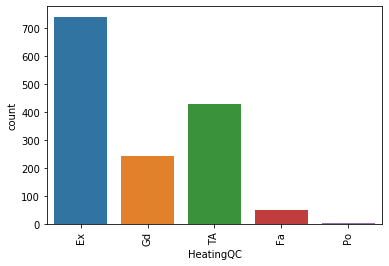

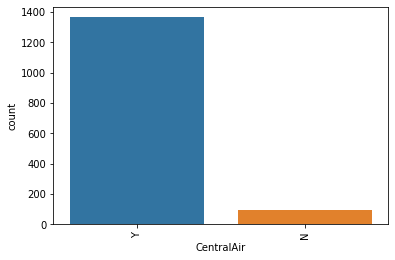

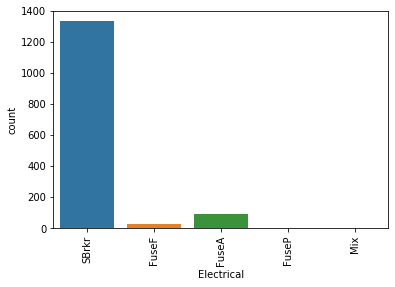

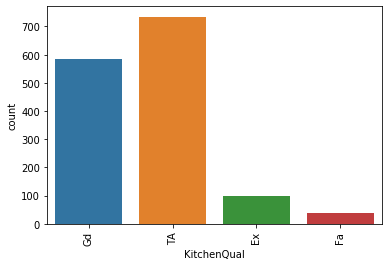

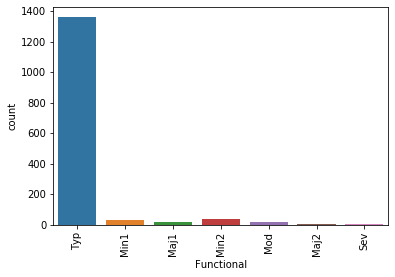

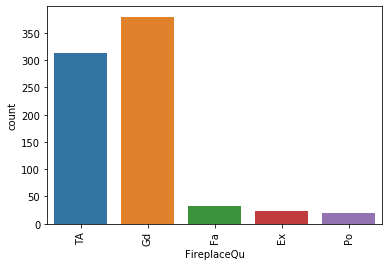

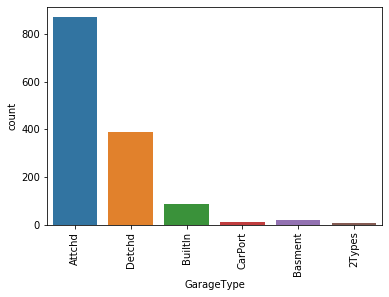

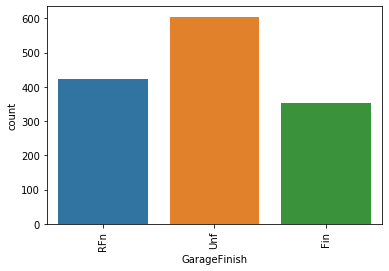

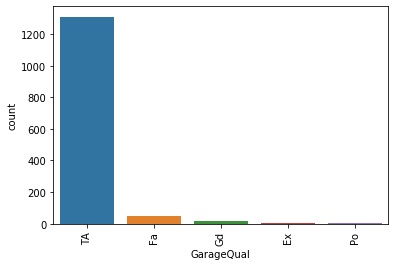

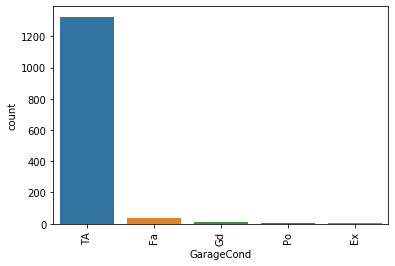

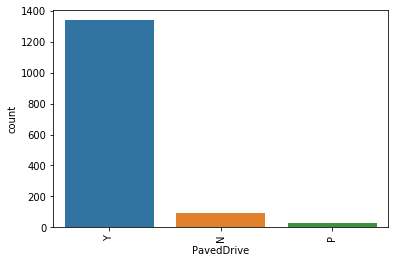

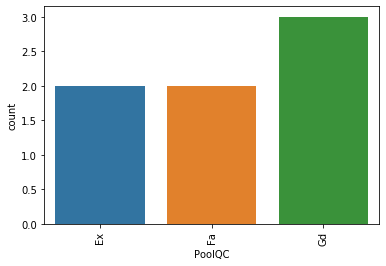

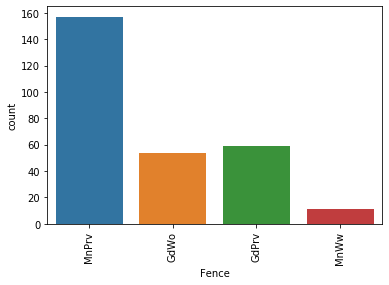

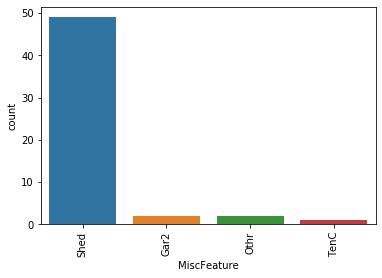

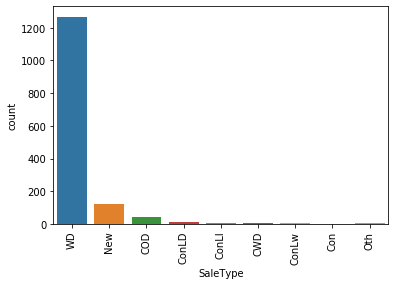

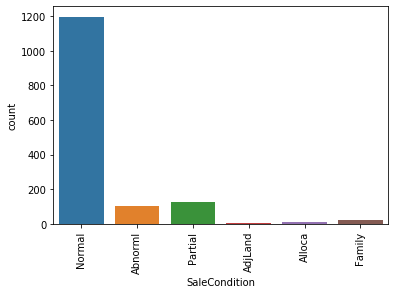

In [33]:
for column in categorical_columns:
    ax = sns.countplot(x=column, data=data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

## Relationship of Categorical Variables with SalePrice

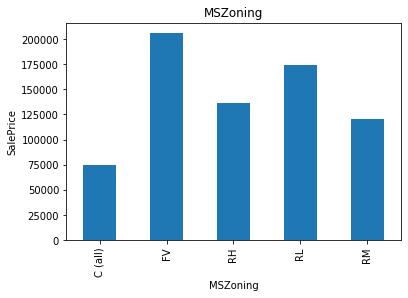

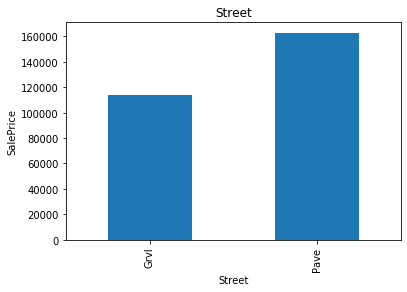

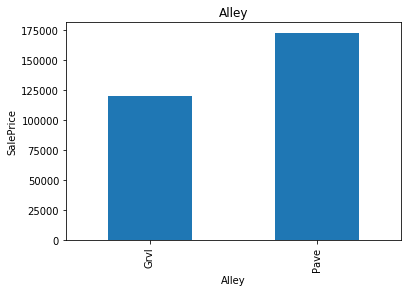

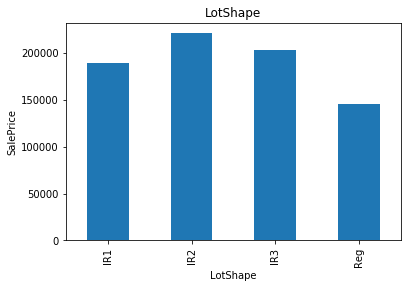

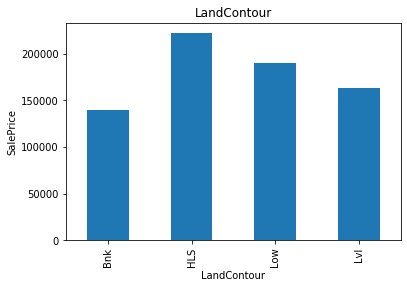

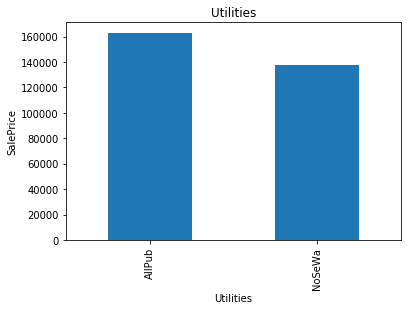

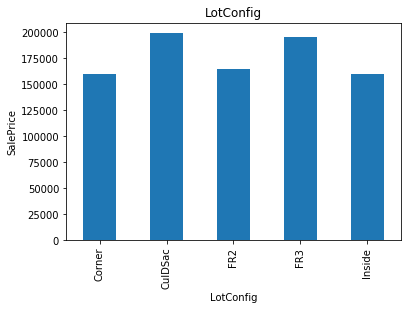

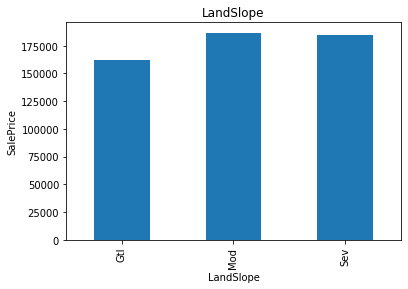

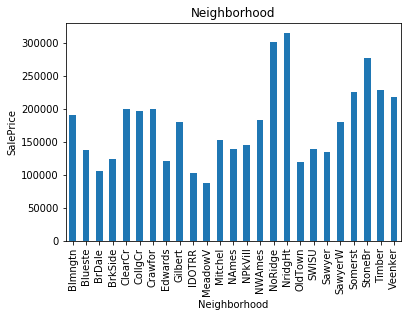

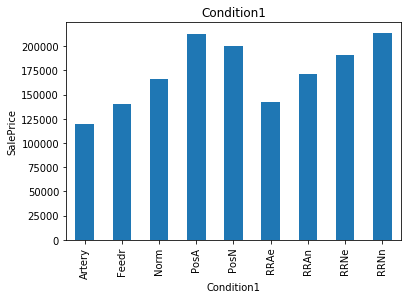

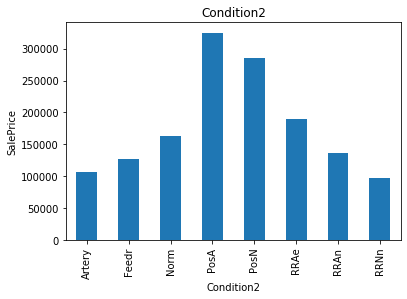

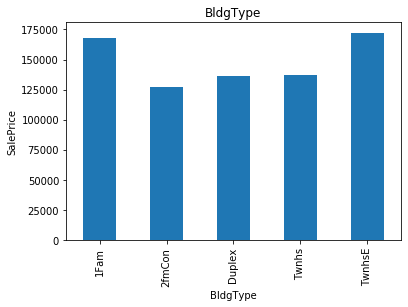

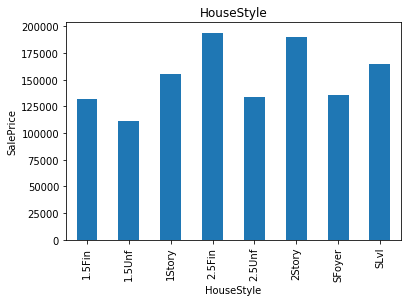

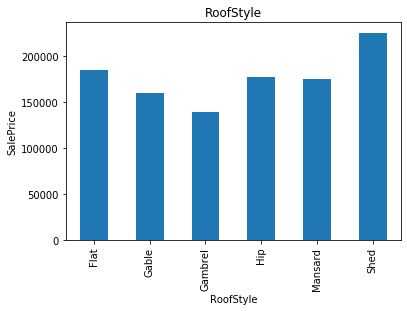

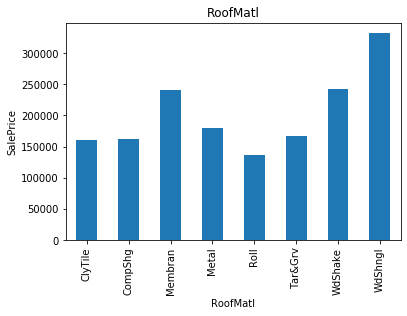

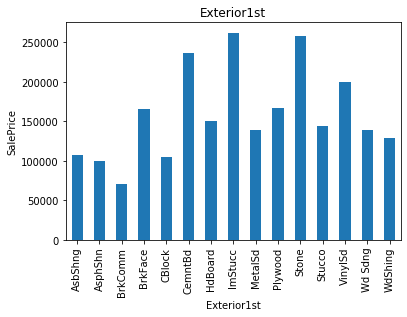

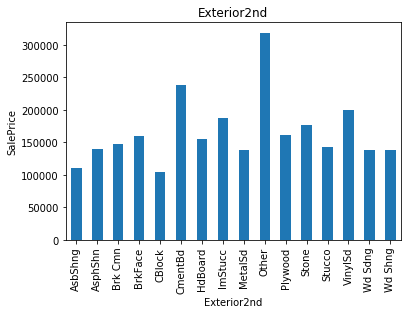

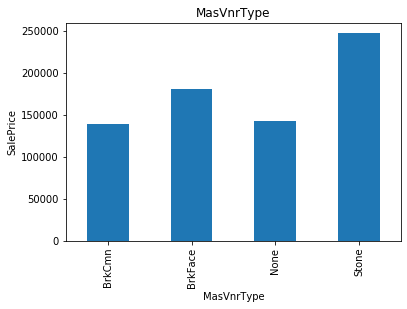

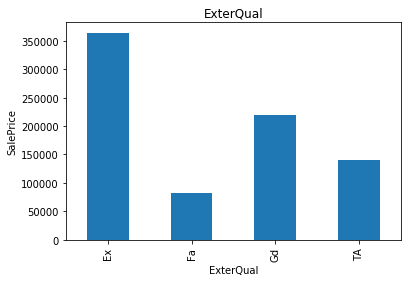

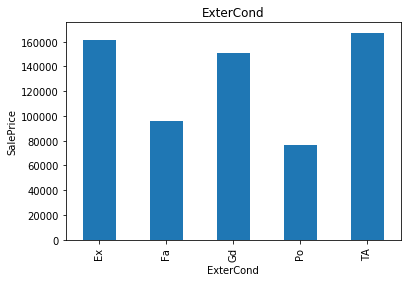

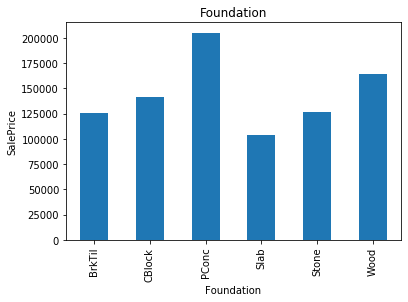

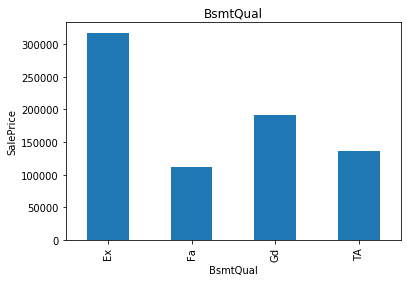

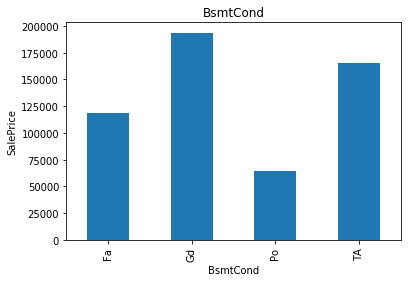

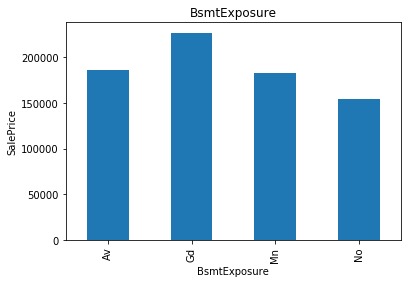

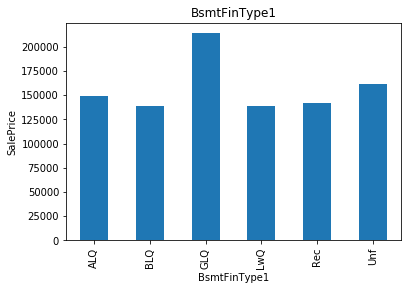

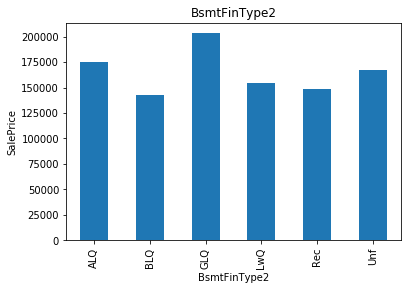

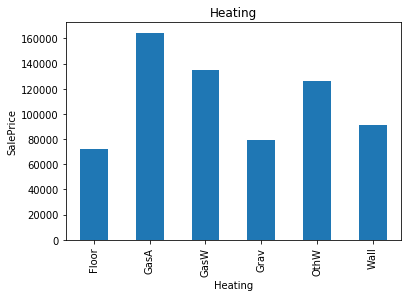

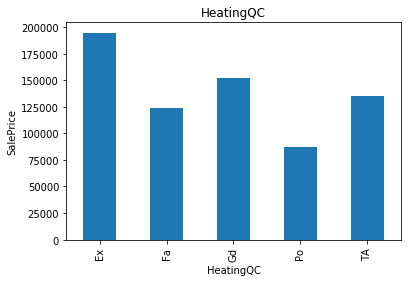

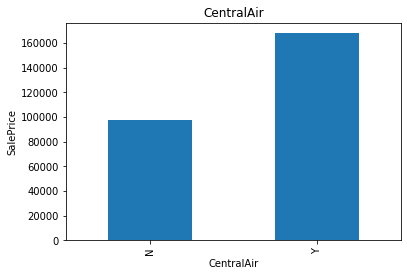

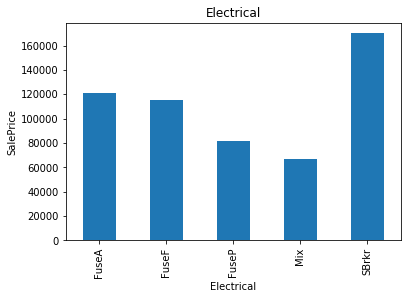

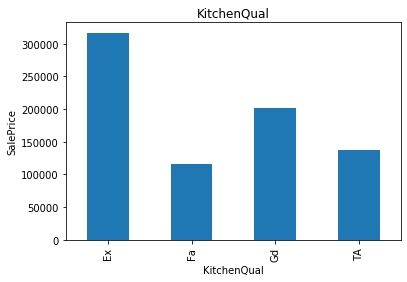

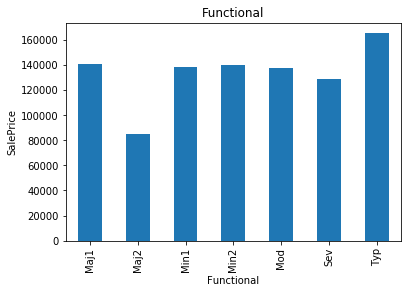

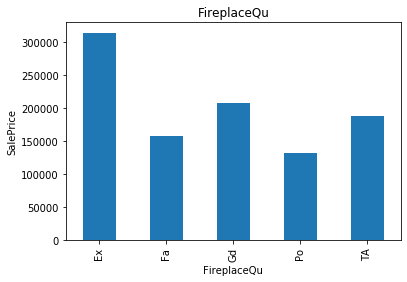

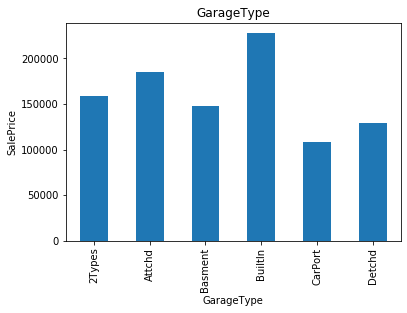

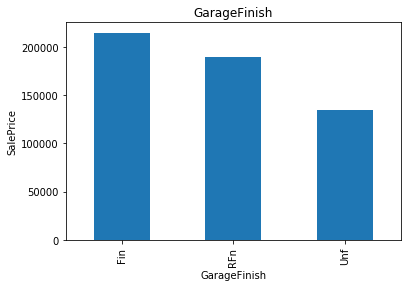

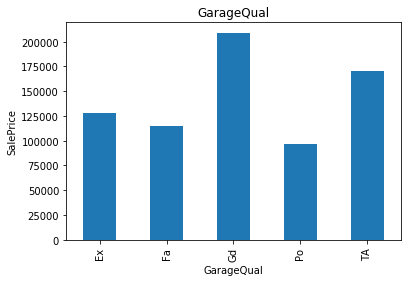

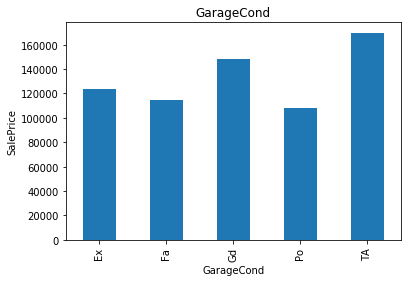

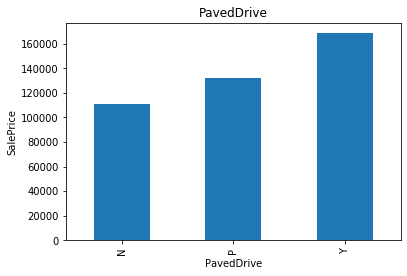

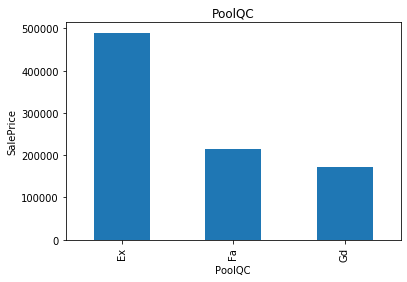

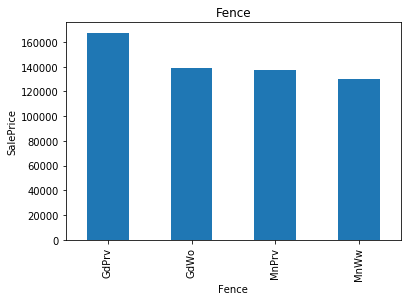

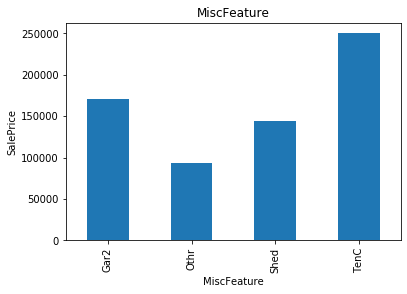

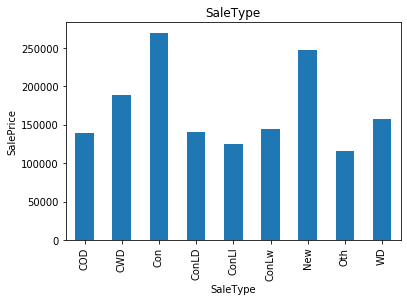

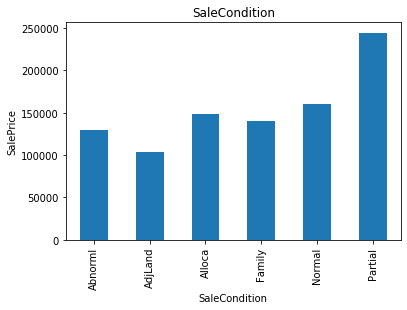

In [34]:
for column in categorical_columns:
    data_copy=data.copy()
    data_copy.groupby(column)['SalePrice'].median().plot.bar()
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.title(column)
    plt.show()

## Density Plots
### Here we make density plot of each continous column

E:\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
E:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
E:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


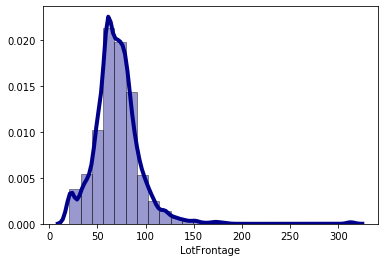

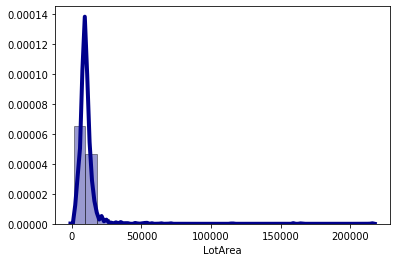

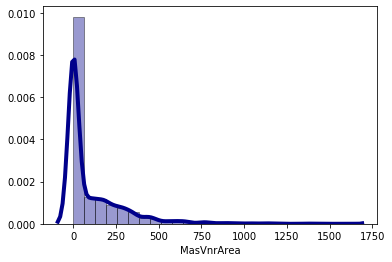

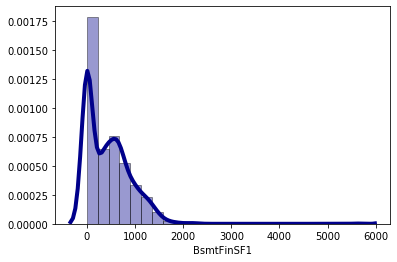

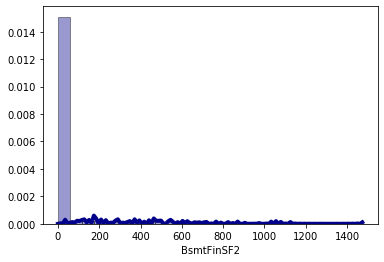

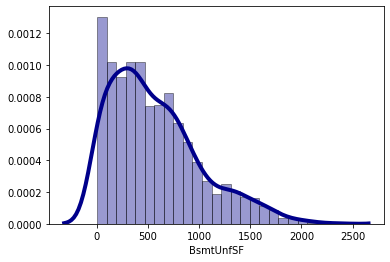

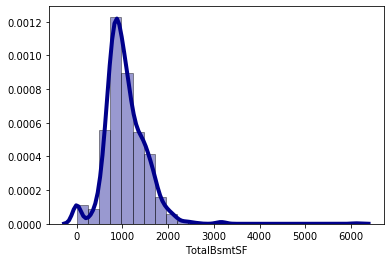

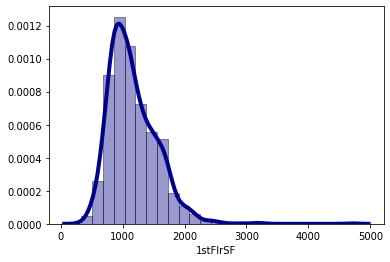

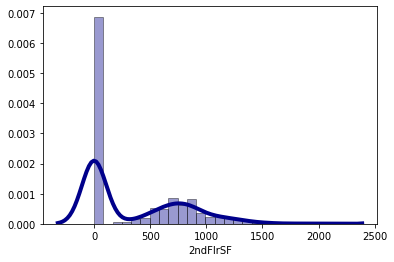

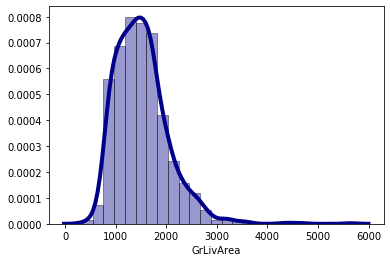

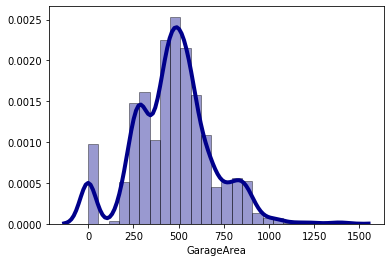

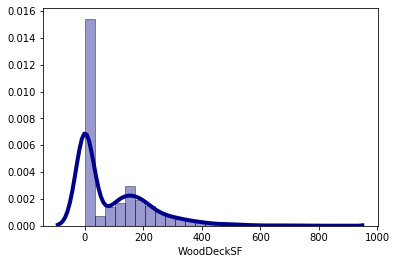

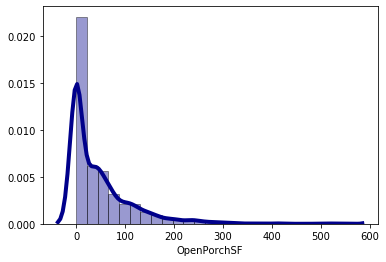

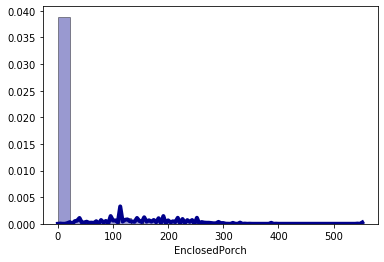

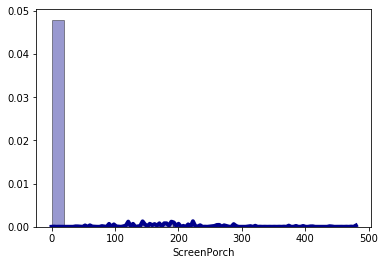

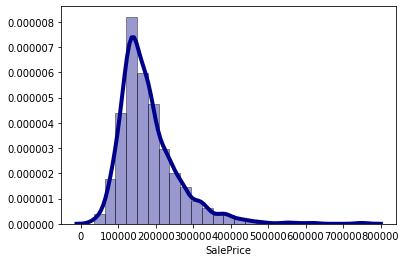

In [35]:
for column in continuous_columns:
    data_copy = data.copy()
    sns.distplot(data_copy[column], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show()

In [36]:
columns_skew = [column for column in continuous_columns if data[column].skew() > 2]

In [37]:
data[columns_skew].skew()

LotFrontage       2.163569
LotArea          12.207688
MasVnrArea        2.669084
BsmtFinSF2        4.255261
OpenPorchSF       2.364342
EnclosedPorch     3.089872
ScreenPorch       4.122214
dtype: float64

In [38]:
data[continuous_columns].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,472.980137,94.244521,46.660274,21.954110,15.060959,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,213.804841,125.338794,66.256028,61.119149,55.757415,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,755000.000000


## Normal Distribution
### It is clearly true that data is not normaly distributed, which is also true with density plot

E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1721: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


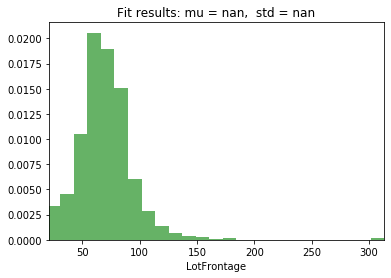

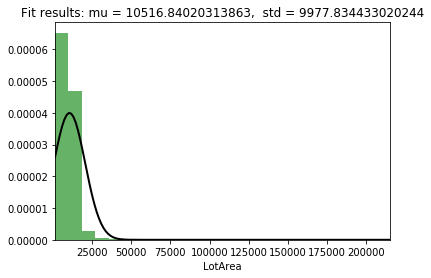

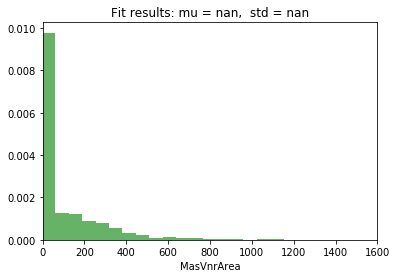

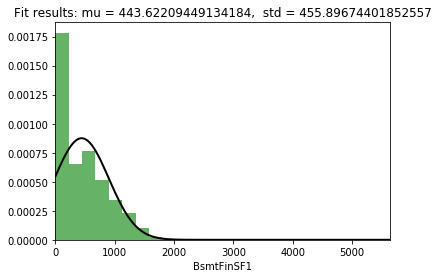

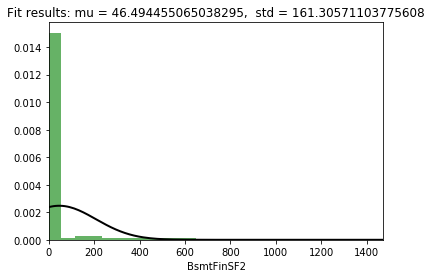

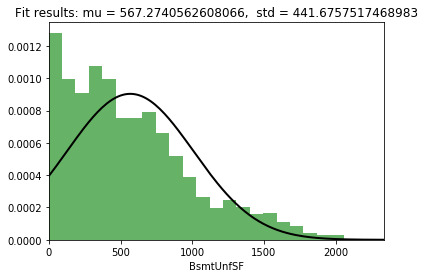

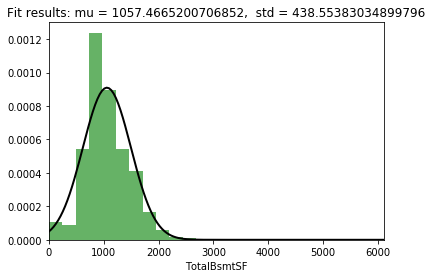

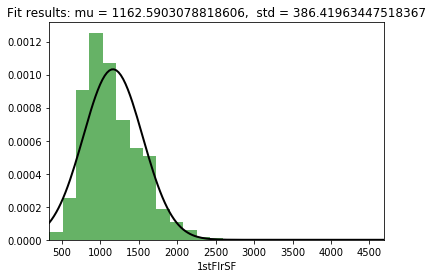

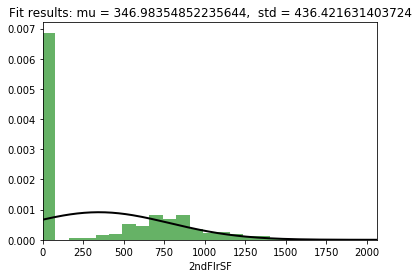

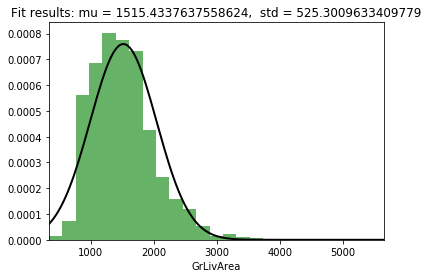

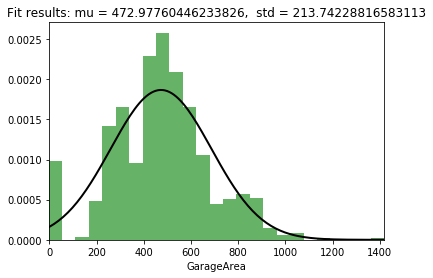

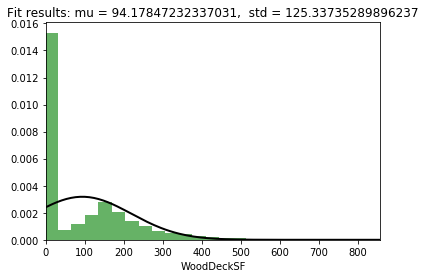

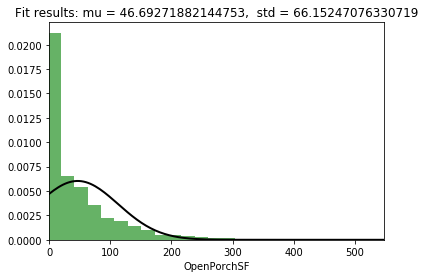

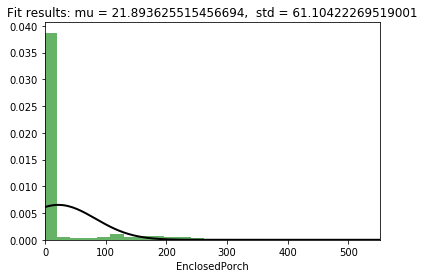

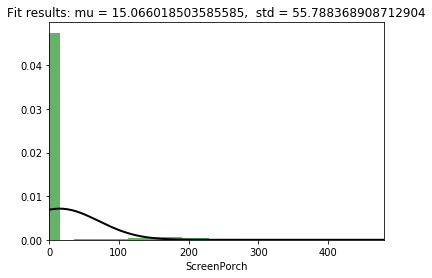

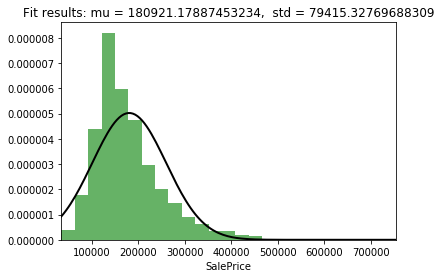

In [39]:
for column in continuous_columns:
    data_copy = data.copy()
    data_copy[column] = np.array(stats.norm.rvs(data_copy[column]))
    mu, std = stats.norm.fit(data_copy[column])
    
    # Plot the histogram
    plt.hist(data_copy[column], bins=25, density=True, alpha=0.6, color='g')
    # Plot the PDF
    xmin, xmax = plt.xlim(min(data[column]), max(data[column]))
    x = np.linspace(xmin, xmax, len(data_copy[column]) // 10)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.xlabel(column)
    plt.title("Fit results: mu = {},  std = {}".format(mu, std))
    plt.show()

## Log Transformation
### With the log transformation we can see pattern

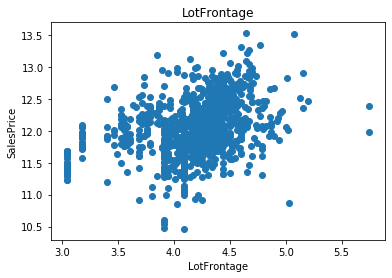

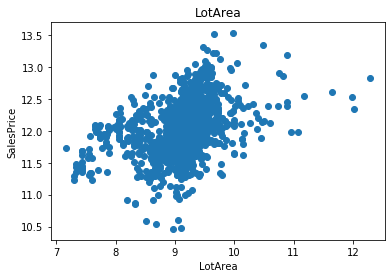

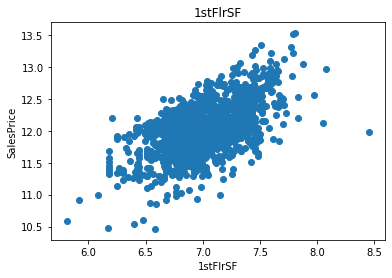

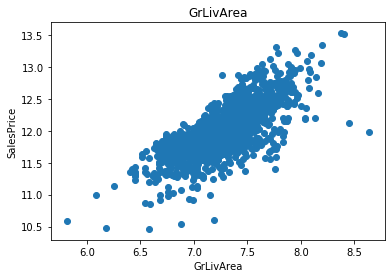

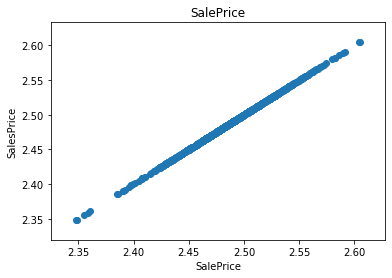

In [40]:
for column in continuous_columns:
    data_copy=data.copy()
    ## Log(0) is infinite
    if 0 in data_copy[column].unique():
        pass
    else:
        data_copy[column]=np.log(data_copy[column])
        data_copy['SalePrice']=np.log(data_copy['SalePrice'])
        plt.scatter(data_copy[column],data_copy['SalePrice'])
        plt.xlabel(column)
        plt.ylabel('SalesPrice')
        plt.title(column)
        plt.show()

## Outliers
### Most Variables are Rightly skewed, which is true with outliers as well.
### We can also compaere wtih previously created Density Function 

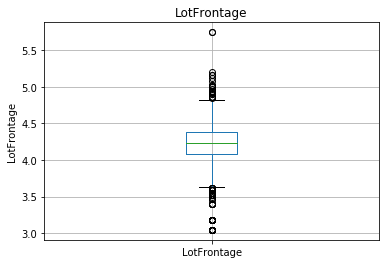

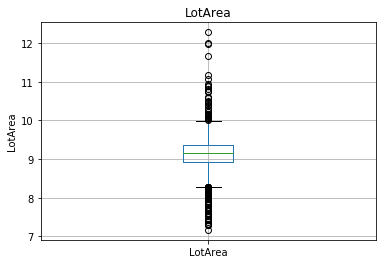

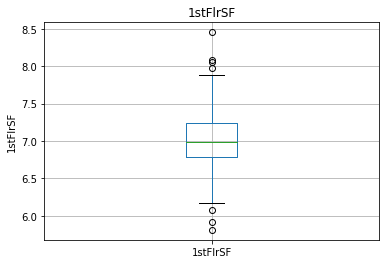

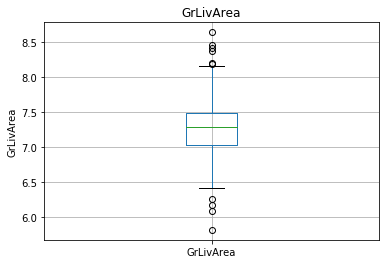

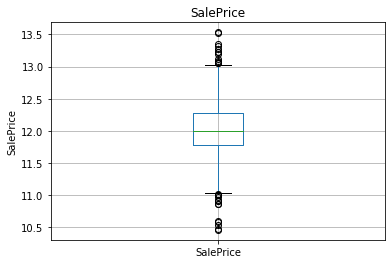

In [41]:
for column in continuous_columns:
    data_copy=data.copy()
    if 0 in data[column].unique():
        pass
    else:
        data_copy[column]=np.log(data_copy[column])
        data_copy.boxplot(column=column)
        plt.ylabel(column)
        plt.title(column)
        plt.show()
        

### Correlation Matrix / Plot
#### OverallQual is highly correlated with SalePrice

In [42]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

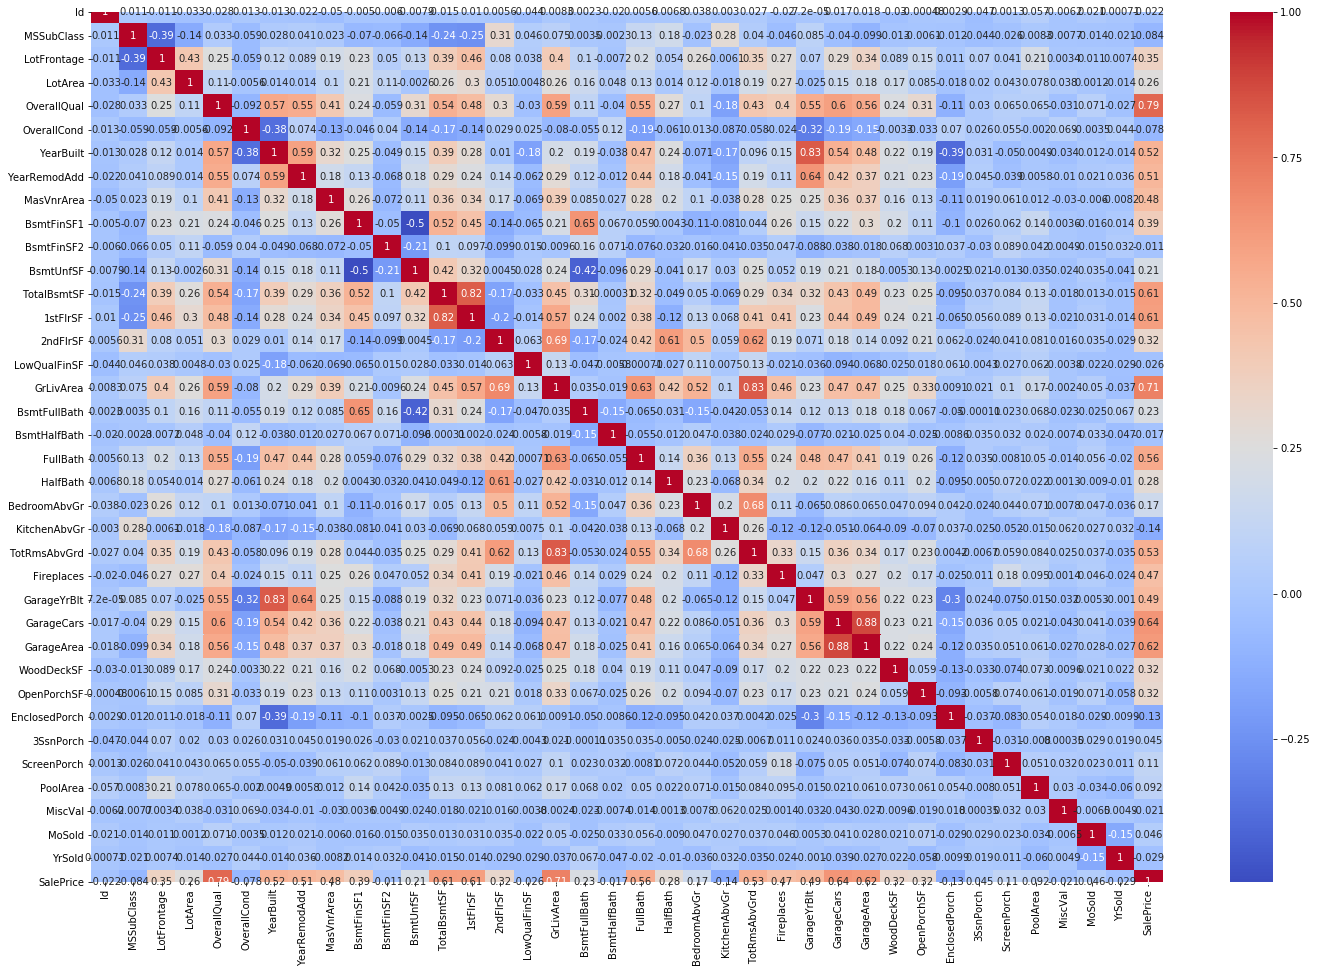

In [43]:
fig, ax = plt.subplots(figsize=(24, 16))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True)
plt.show()

In [50]:
numeric_corr = data[numerical_columns].corr()

In [51]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [52]:
print (numeric_corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (numeric_corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64
